In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
     

In [2]:
insurance = pd.read_csv("insurance.csv")

In [3]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

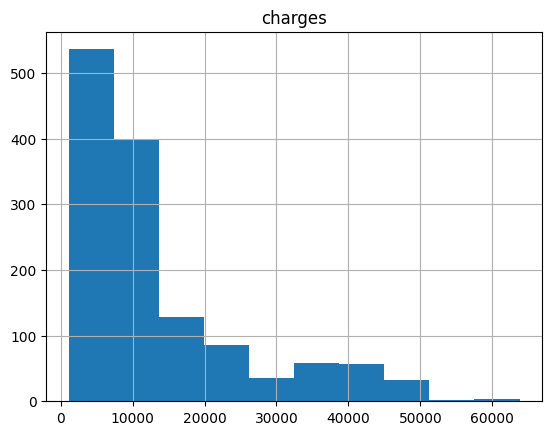

In [5]:
insurance.hist("charges")

array([[<AxesSubplot:title={'center':'log_charges'}>]], dtype=object)

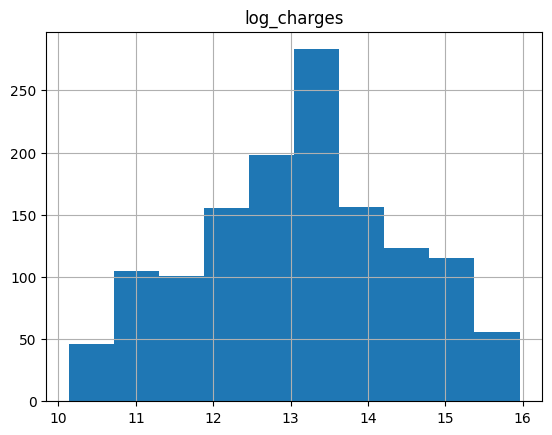

In [11]:
insurance["log_charges"] = np.log2(insurance["charges"])

insurance.hist("log_charges")

In [12]:
insurance["is_smoker"] = (insurance["smoker"] == "yes")
X = insurance[["age", "bmi", "is_smoker"]]
y = insurance["log_charges"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 1)

In [14]:
insurance_model = LinearRegression()
insurance_model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = insurance_model.predict(X_train)

mean_squared_error(y_train, y_pred)

0.4546665339270644

In [16]:
np.exp(mean_squared_error(y_train, y_pred))

1.575647870310887

In [17]:
r2_score(y_train, y_pred)

0.7421118855283421

<AxesSubplot:xlabel='fitted', ylabel='residuals'>

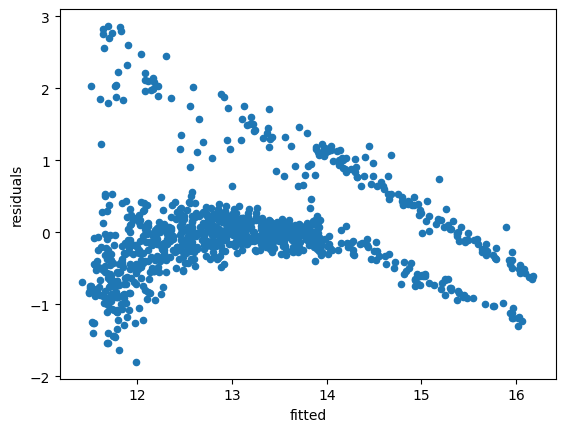

In [18]:
check = pd.DataFrame()
check["residuals"] = y_train - y_pred
check["fitted"] = y_pred

check.plot.scatter(x = "fitted", y = "residuals")